In [1]:
# Import all the libraries

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Activation
from keras import Input,Model
from keras.datasets import mnist

import matplotlib.pyplot as plt


In [2]:
# lets create model architetuure

model = Sequential()

model.add(Conv2D(40,kernel_size = 3,activation = "relu",padding = "same",input_shape = (28,28,1)))
model.add(MaxPooling2D(2,padding = "same"))

model.add(Conv2D(25,kernel_size = 3,activation = "relu",padding = "same"))
model.add(MaxPooling2D(2,padding = "same"))

model.add(Conv2D(25,kernel_size = 3,activation = "relu",padding = "same"))
model.add(UpSampling2D(2))

model.add(Conv2D(40,kernel_size = 3,activation = "relu",padding = "same"))
model.add(UpSampling2D(2))

model.add(Conv2D(1,kernel_size = 3,activation = "sigmoid",padding = "same"))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 40)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        9025      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 25)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 25)        0

In [4]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])



In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255



11490434/11490434 [==============================] - 1s 0us/step


In [6]:
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
model.fit(x_train,
          x_train,
          epochs = 5,
          batch_size = 128,
          validation_data = (x_test,x_test))

Epoch 1/5
469/469 [==============================] - 26s 18ms/step - loss: 0.1290 - accuracy: 0.8087 - val_loss: 0.0774 - val_accuracy: 0.8138
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - accuracy: 0.8150 - val_loss: 0.0727 - val_accuracy: 0.8142
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0722 - accuracy: 0.8152 - val_loss: 0.0707 - val_accuracy: 0.8143
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0706 - accuracy: 0.8153 - val_loss: 0.0695 - val_accuracy: 0.8143
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0695 - accuracy: 0.8154 - val_loss: 0.0685 - val_accuracy: 0.8144


313/313 [==============================] - 1s 3ms/step


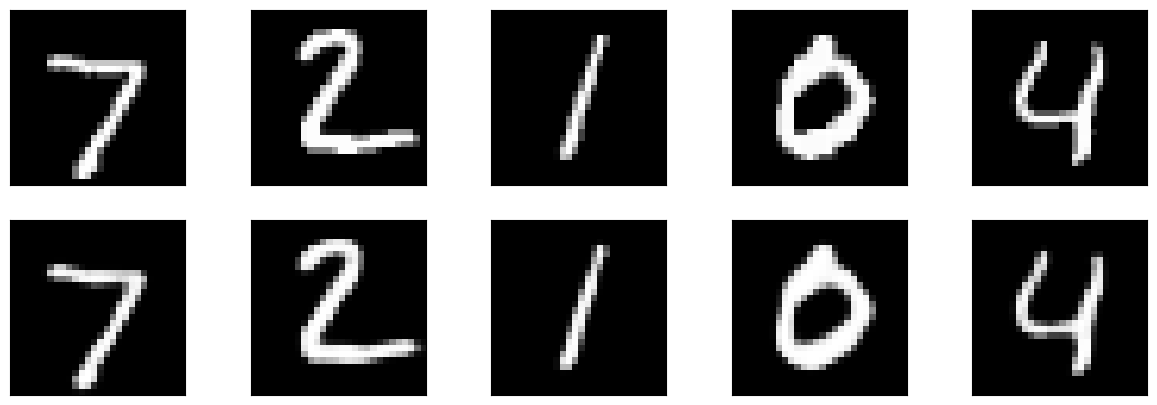

In [11]:
prediction = model.predict(x_test)

plt.figure(figsize = (15,5))

for i in range(5):
  # original
  sub = plt.subplot(2,5,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  sub.get_xaxis().set_visible(False)
  sub.get_yaxis().set_visible(False)

  # predicted_image
  sub = plt.subplot(2,5,i+1+5)

  plt.imshow(prediction[i].reshape(28,28))
  plt.gray()
  sub.get_xaxis().set_visible(False)
  sub.get_yaxis().set_visible(False)

plt.show()

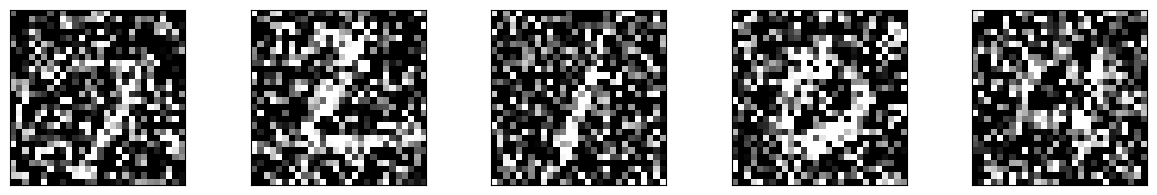

In [17]:
noise = 0.7

x_train_noise = x_train + noise * np.random.normal(loc= 0,scale = 1,size = x_train.shape)
x_test_noise = x_test + noise * np.random.normal(loc= 0,scale = 1,size = x_test.shape)

x_train_noise = np.clip(x_train_noise,0,1)
x_test_noise = np.clip(x_test_noise,0,1)

plt.figure(figsize = (15,5))

for i in range(5):
  # original image
  sub = plt.subplot(2,5,i+1+5)

  plt.imshow(x_test_noise[i].reshape(28,28))
  plt.gray()
  sub.get_xaxis().set_visible(False)
  sub.get_yaxis().set_visible(False)

plt.show()

In [22]:
# lets create model architetuure

model_1 = Sequential()

model_1.add(Conv2D(40,kernel_size = 3,activation = "relu",padding = "same",input_shape = (28,28,1)))
model_1.add(MaxPooling2D(2,padding = "same"))

model_1.add(Conv2D(25,kernel_size = 3,activation = "relu",padding = "same"))
model_1.add(MaxPooling2D(2,padding = "same"))

model_1.add(Conv2D(25,kernel_size = 3,activation = "relu",padding = "same"))
model_1.add(UpSampling2D(2))

model_1.add(Conv2D(40,kernel_size = 3,activation = "relu",padding = "same"))
model_1.add(UpSampling2D(2))

model_1.add(Conv2D(1,kernel_size = 3,activation = "sigmoid",padding = "same"))

model_1.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


model_1.fit(x_train_noise,
          x_train,
          epochs = 10,
          batch_size = 128,
          validation_data = (x_test_noise,x_test))



Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.1908 - accuracy: 0.8017 - val_loss: 0.1498 - val_accuracy: 0.8028
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1451 - accuracy: 0.8061 - val_loss: 0.1401 - val_accuracy: 0.8042
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1381 - accuracy: 0.8074 - val_loss: 0.1344 - val_accuracy: 0.8073
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1340 - accuracy: 0.8082 - val_loss: 0.1311 - val_accuracy: 0.8077
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1315 - accuracy: 0.8086 - val_loss: 0.1292 - val_accuracy: 0.8082
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1294 - accuracy: 0.8089 - val_loss: 0.1272 - val_accuracy: 0.8081
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1278 - accuracy: 0.8091 - val_loss: 0.1262 - val_accuracy: 0.8085
Epoch 

313/313 [==============================] - 1s 2ms/step


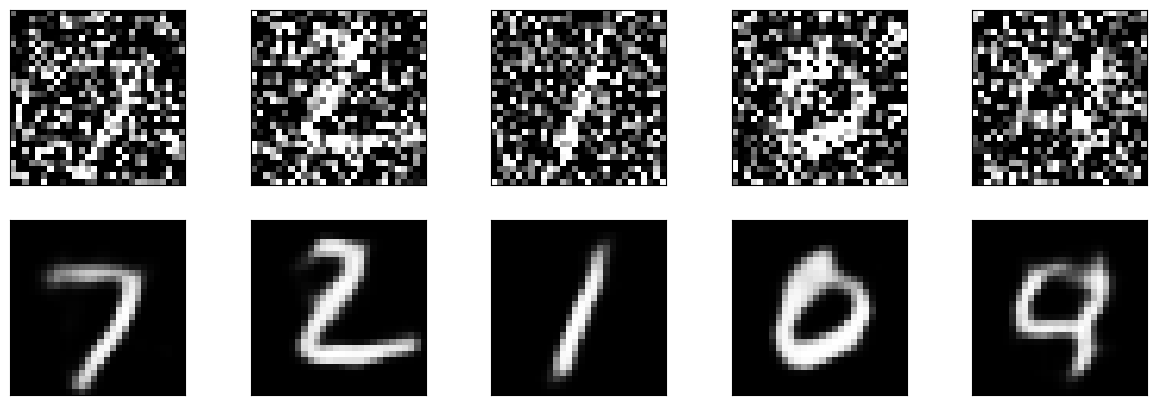

In [23]:
prediction_1 = model_1.predict(x_test_noise)

plt.figure(figsize = (15,5))

for i in range(5):
  # original
  sub = plt.subplot(2,5,i+1)
  plt.imshow(x_test_noise[i].reshape(28,28))
  plt.gray()
  sub.get_xaxis().set_visible(False)
  sub.get_yaxis().set_visible(False)

  # predicted_image
  sub = plt.subplot(2,5,i+1+5)

  plt.imshow(prediction_1[i].reshape(28,28))
  plt.gray()
  sub.get_xaxis().set_visible(False)
  sub.get_yaxis().set_visible(False)

plt.show()